## Supp. Figure 4: The Fraction of Trials Per State for Each Session for Each Mouse

This notebook recreates the figure panels included in Extended Data Figure 10 of [Bolkan, Stone et al 2021](https://www.biorxiv.org/content/10.1101/2021.07.23.453573v1). 

The general premise of this notebook/figure, in the context of the paper, is to clearly demonstrate how each mouse occupies different states in each session that it engages in the task. It is the same type of plot shown in Figure 7H (see <code>fig7.ipynb</code>) but with each plot showing the sessions for an individual mouse, rather than for all mice at once. While the animals' behavior is heterogeneous, this plot demonstrates that most individual mice visit multiple types and numbers of states over the course of sessions. 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import numpy as np
import pickle
from glmhmm.utils import permute_states
from glmhmm.visualize import plot_fraction_of_trials_per_state

In [2]:
# load fit GLM-HMMS
GLMHMM_d2 = pickle.load(open('fit models/GLMHMM_d2.pickle','rb'))
GLMHMM_d1 = pickle.load(open('fit models/GLMHMM_d1.pickle','rb'))

# load additional data
sessions_d2 = np.load('data/indirect_sessions.npy') # vector of session start and stop indices
sessions_d1 = np.load('data/direct_sessions.npy') # vector of session start and stop indices
mouseIDs_d2 = np.load('data/indirect_mouseIDs.npy') # vector of mouse IDs for each trial
mouseIDs_d1 = np.load('data/direct_mouseIDs.npy') # vector of mouse IDs for each trial

# get order in which to permute states
_,order_d2 = permute_states(GLMHMM_d2.w[:,:,1],method='weight value',param='weights',ix=1)
_,order_d1 = permute_states(GLMHMM_d1.w[:,:,1],method='weight value',param='weights',ix=1)

# permute the state probabilities 
pstate_permuted_d2,_ = permute_states(GLMHMM_d2.pStates,method='order',param='pstates',order=order_d2)
pstate_permuted_d1,_ = permute_states(GLMHMM_d1.pStates,method='order',param='pstates',order=order_d1)

# set color preferences
colors = np.array([[39,110,167],[237,177,32],[233,0.0001,111]])/255

#### Indirect Pathway 

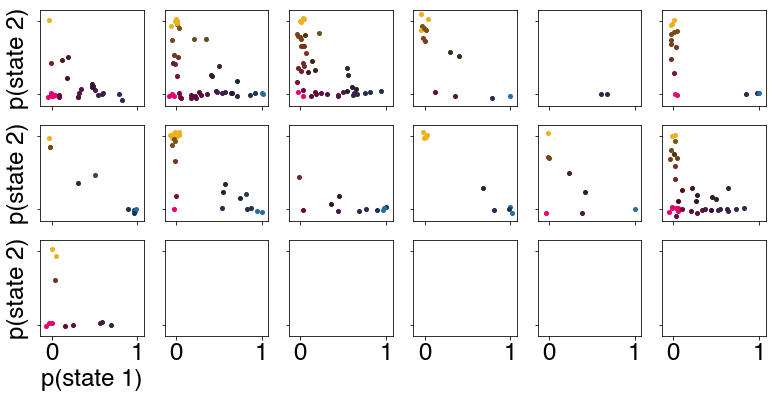

In [22]:
fig, axes = plt.subplots(3,6,sharey=True,sharex=True)
fig.set_size_inches(13, 6)
axes = axes.flatten()
num_mice = len(np.unique(mouseIDs_d2))
for i in range(num_mice):
    plot_fraction_of_trials_per_state(pstate_permuted_d2,sessions_d2,mouseIDs_d2,colors,axes[i],mouse=i)
    if i not in [0,6,12]: 
        axes[i].set_ylabel('')
        axes[i].set_yticklabels('')
    if i not in [12]:
        axes[i].set_xlabel('')

#### Direct Pathway

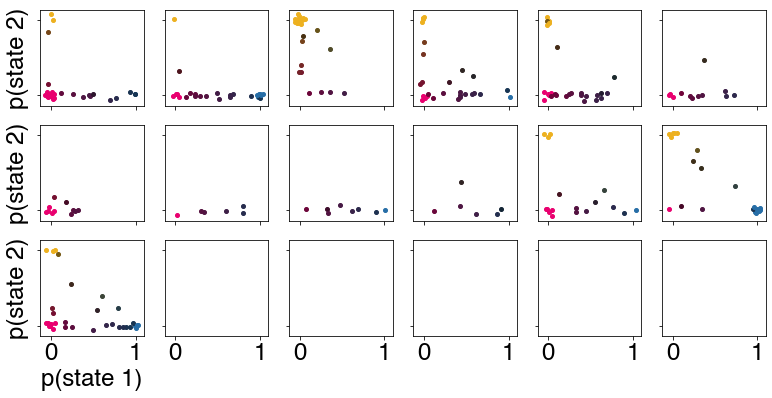

In [23]:
fig, axes = plt.subplots(3,6,sharey=True,sharex=True)
fig.set_size_inches(13, 6)
axes = axes.flatten()
num_mice = len(np.unique(mouseIDs_d1))
for i in range(num_mice):
    plot_fraction_of_trials_per_state(pstate_permuted_d1,sessions_d1,mouseIDs_d1,colors,axes[i],mouse=i)
    if i not in [0,6,12]: 
        axes[i].set_ylabel('')
        axes[i].set_yticklabels('')
    if i not in [12]:
        axes[i].set_xlabel('')